<a href="https://colab.research.google.com/github/rishav-eulb/FSM/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [4]:
import pandas as pd

pd.read_csv("Medical_Price_Dataset.csv")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We need to convert categorical variable into numerical variable.

In [13]:
import pandas as pd

def encode_categorical_variables(data):
    # Encode categorical variables using one-hot encoding
    encoded_data = pd.get_dummies(data, columns=["sex", "smoker", "region"])
    return encoded_data

data = pd.read_csv("Medical_Price_Dataset.csv")
encoded_data = encode_categorical_variables(data)
print(encoded_data.head())


   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 

In [14]:
import numpy as np
import pandas as pd


# Extract features and target variable
X = encoded_data.iloc[:, :-1].values
y = encoded_data.iloc[:, -1].values

# Add bias term to the feature matrix
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Split the data into training and testing sets
train_ratio = 0.8
train_size = int(train_ratio * X.shape[0])

X_train = X_with_bias[:train_size]
X_test = X_with_bias[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Linear Regression implementation
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Compute the coefficients using the normal equation
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Make predictions using the learned coefficients
        return X.dot(self.coefficients)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 2.1477092654125283


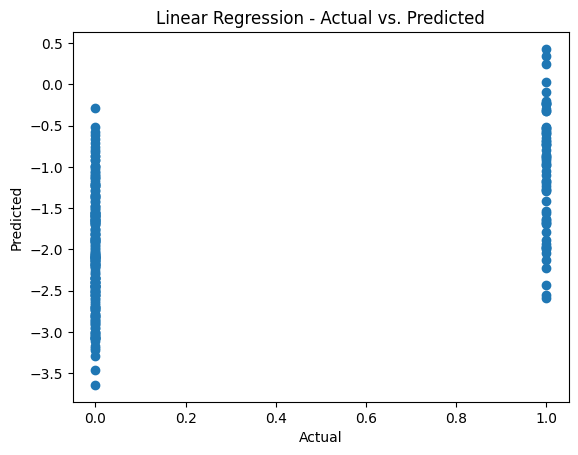

In [16]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Actual vs. Predicted')
plt.show()